In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning - Week 3
## Logistic Regression

Logistic regression is essentially a classification method where you are attempting perform an either-or classification on a dataset.  An example could be trying to predict if an o-ring on a rocket would fail, given the outside temperature, or if a tumor is malignant or not given its size and other variables (or "features" in machine learning parlance).  The dataset is set up in a way that y is either 0 or 1. 

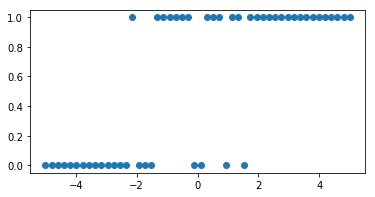

In [40]:
x = np.linspace(-5,5)
y = np.zeros(x.shape)
for i in range(0, x.size):
    if x[i] + 2*np.random.randn(1) > 0:        
        y[i] = 1
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(x, y, 'o');

In order to correctly classify this type of dataset, we need our hypothesis ($h_{\theta}(x)$) to be between 0 and 1.  So we want $0 \le h_{\theta}(x) \le 1$.  One candidate function is the logistic function, $g(z) = \frac{1}{1+e^{-z}}$.  Putting this into our hypothesis function, gives us $h_{\theta}(x) = \frac{1}{1+e^{-\theta^Tx}}$, where $\theta$ is the parameters of our model.  We can interpret this as the probability that $y$ is 1, for a given $x$ and fitted parameters $\theta$.  Or, mathematically, $P(y=1|x;\theta)$.  

In [5]:
def logistic(z):
    return 1./(1.+np.exp(-z))

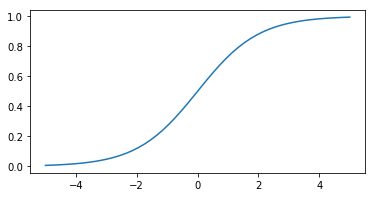

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))
z = np.linspace(-5,5)
ax.plot(z, logistic(z), '-');

This allows us to set a **decision boundary**.  This is a rule that we set for the prediction of our class.  So we can say "predict y=1" if $h_{\theta}(x) \ge 0.5$, this implies that $\theta^T x \ge 0$. Similarly,  we "predict y=0" if $h_{\theta}(x) \lt 0.5$, this implies that $\theta^T x \lt 0$.

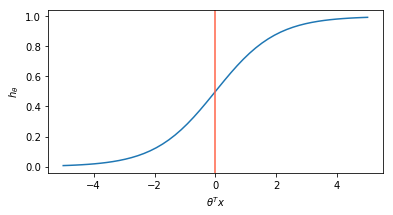

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6,3))
z = np.linspace(-5,5)
ax.plot(z, logistic(z), '-')
ax.axvline(x=0, color='tomato')
ax.set_ylabel(r'$h_{\theta}$')
ax.set_xlabel(r'$\theta^T x$');

### Fitting a logistic regression model
The $cost$ function for a logistic regession looks like this:
$$
Cost(h_{\theta}(x), y) =     
        \begin{cases}
          -log(h_{\theta}(x)), & \text{if}\ y = 1 \\
          -log(1 - h_{\theta}(x)), & \text{if}\ y = 0
        \end{cases}
$$

So, if y = 1, $Cost = 0$, if $h_{\theta}(x)=1$, but as $h_{\theta}(x) \rightarrow 0$, $Cost \rightarrow \infty$.  Likewise, if y = 0, $Cost = 0$, if $h_{\theta}(x)=0$, but as $h_{\theta}(x) \rightarrow 1$, $Cost \rightarrow \infty$. There is a high penalty for the incorrect classification.

The $Cost$ function can be re-written as
$$
Cost(h_{\theta}(x), y) = -y log(h_{\theta}(x)) - (1-y) log(1 - h_{\theta}(x))
$$

and then,

$$
J(\theta) = \frac{1}{m}\sum_{i=1}^m Cost(h_{\theta}(x^{(i)}), y^{(i)})
$$
or,
$$
J(\theta) = \frac{-1}{m}\sum_{i=1}^m [y^{(i)} log(h_{\theta}(x^{(i)})) - (1-y^{(i)}) log(1 - h_{\theta}(x^{(i)})])
$$

To find the parameters $\theta$ we need to minimise $J(\theta)$ over $\theta$.  To find $min_{\theta}J(\theta)$:

repeat { $\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$}

In this case, $\frac{\partial}{\partial \theta_j}J(\theta)$ reduces to ($h_{\theta}(x)- y)x$.


Implementing this for the dataset above:

In [31]:
def diff_j(theta, x, y):
    '''The differential of the cost function'''
    
    return 1.0/(np.size(x)) * np.sum((logistic(theta*x) - y)*x)

def log_cost_func(theta, x, y):
    
    return -1. * np.sum(y * np.log(logistic(theta*x)) + (1. - y)*np.log(1. - logistic(theta*x)))

def update_j(theta, x, y, alpha):
    
    #calculate the partial diff
    d_j = diff_j(theta, x, y)
    #update theta_1
    temp_theta = theta - alpha * d_j
    theta = temp_theta
    
    #calculate the cost function with the new theta
    j = log_cost_func(theta, x, y)
    return j, theta
    

In [41]:
theta_1 = 0.5
j_n1 = log_cost_func(theta_1, x, y)
alpha = 0.0001
j = 0.
tol = 0.0001
# perform update until change in J is within some tolerance level
while np.abs(j - j_n1) > tol:
    j_n1 = j
    j, theta_1 = update_j(theta_1, x, y, alpha)
#     print 'updated J: %s, theta_1: %s' %('{0:0.1f}'.format(j), '{0:0.3f}'.format(theta_1))
    
print 'Final J: %s, theta_1: %s' %('{0:0.1f}'.format(j), '{0:0.3f}'.format(theta_1))

Final J: 18.3, theta_1: 0.618


In [44]:
def classify(theta, x, db=0.0):
    classified_points = np.zeros(x.shape)
    classified_points[theta*x>=db] = 1
    classified_points[theta*x<db] = 0
    return classified_points

We can then apply the decision boundary from above, and classify each of the points.  The miss-classified points are circled in red.  In this case the classification is fairly trivial, but the process would be the same for a case with more parameters.

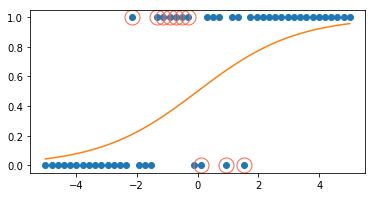

In [50]:
cp = classify(theta_1, x)
fig, ax = plt.subplots(1, 1, figsize=(6,3))
ax.plot(x, y, 'o')
ax.plot(x, logistic(theta_1*x))

for xi, yi, cpi in zip(x, y, cp):
    if yi != cpi:
        ax.plot(xi, yi, 'o', markeredgecolor='tomato', markerfacecolor='none', markersize=15)

In the case of a mulitple classification, you would set up multiple hypothesis where each hypothesis classified one of the classes as 1 and the remaining as 0.  Then the same process would be followed and a decision boundary created to classify the points.

## Overfitting

Too many features will result in the learned hypothesis fitting the trainign data very well, but failing to generalise to new examples. There are a couple of options to deal with this problem.

1. Reduce the number of features:
    - manually select which features to keep (but can lead to model selction bias)
2. Regularization:
    - keep all the features, but reduce the magnitude/values of parameter $\theta_j$
    - works when there are a lot of features that all contribute to y.
    
#### Regularization
This works by modifiying the $Cost$ function:
$$
J(\theta) = \frac{1}{2m}[\sum^m_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 + \lambda \sum^n_{j=1}\theta^2_j]
$$

The $\lambda \sum^n_{j=1}\theta^2_j$ forces a trade-off between minimising the cost and keeping the parameters small.